In [26]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [27]:
#carregar os dados do arquivo txt
data = pd.read_csv('salv_708_2004_2021.txt', delimiter='\t', header=None)

In [28]:
# Renomear as colunas
data.columns = ['dt', 'hr', 'alt']

In [29]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['dt_hr'] = pd.to_datetime(data['dt'] + ' ' + data['hr'], format='%d/%m/%Y %H:%M')

In [30]:
# Converter a coluna 'dt_hrs' para o índice do DataFrame, se ainda não estiver
data.set_index('dt_hr', inplace=True)

In [31]:
# Calcula a média da coluna 'mare'
media_mare = 6.880 

# Subtrai a média de todos os valores na coluna 'mare' e adiciona como uma nova coluna
data['alt_zero'] = data['alt'] - media_mare
data['alt_zero'] = data['alt_zero'] * 100

# Exibe os primeiros valores do DataFrame com as colunas originais e a 'mare' centralizada
print(data[['dt', 'hr', 'alt', 'alt_zero',]])

                             dt     hr    alt  alt_zero
dt_hr                                                  
2004-10-15 05:00:00  15/10/2004  05:00  8.447     156.7
2004-10-15 06:00:00  15/10/2004  06:00  8.090     121.0
2004-10-15 07:00:00  15/10/2004  07:00  7.505      62.5
2004-10-15 08:00:00  15/10/2004  08:00  6.864      -1.6
2004-10-15 09:00:00  15/10/2004  09:00  6.313     -56.7
...                         ...    ...    ...       ...
2021-12-31 19:00:00  31/12/2021  19:00  6.431     -44.9
2021-12-31 20:00:00  31/12/2021  20:00  6.235     -64.5
2021-12-31 21:00:00  31/12/2021  21:00  6.280     -60.0
2021-12-31 22:00:00  31/12/2021  22:00  6.587     -29.3
2021-12-31 23:00:00  31/12/2021  23:00  7.047      16.7

[150883 rows x 4 columns]


In [32]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['data_hora'] = data['dt'] + ' ' + data['hr']

data['data_hora'] = pd.to_datetime(data['data_hora'], format='%d/%m/%Y %H:%M')

# Exibindo o DataFrame atualizado
print(data)

                             dt     hr    alt  alt_zero           data_hora
dt_hr                                                                      
2004-10-15 05:00:00  15/10/2004  05:00  8.447     156.7 2004-10-15 05:00:00
2004-10-15 06:00:00  15/10/2004  06:00  8.090     121.0 2004-10-15 06:00:00
2004-10-15 07:00:00  15/10/2004  07:00  7.505      62.5 2004-10-15 07:00:00
2004-10-15 08:00:00  15/10/2004  08:00  6.864      -1.6 2004-10-15 08:00:00
2004-10-15 09:00:00  15/10/2004  09:00  6.313     -56.7 2004-10-15 09:00:00
...                         ...    ...    ...       ...                 ...
2021-12-31 19:00:00  31/12/2021  19:00  6.431     -44.9 2021-12-31 19:00:00
2021-12-31 20:00:00  31/12/2021  20:00  6.235     -64.5 2021-12-31 20:00:00
2021-12-31 21:00:00  31/12/2021  21:00  6.280     -60.0 2021-12-31 21:00:00
2021-12-31 22:00:00  31/12/2021  22:00  6.587     -29.3 2021-12-31 22:00:00
2021-12-31 23:00:00  31/12/2021  23:00  7.047      16.7 2021-12-31 23:00:00

[150883 row

In [33]:
# Converter a coluna 'data_hora' para o índice do DataFrame, se ainda não estiver
data.set_index('data_hora', inplace=True)

# Calcular a média mensal da coluna 'alt_zero' corresponde a altura após a subtração da 
media_mensal = data['alt_zero'].resample('M').mean()

# Exibir a média mensal
print(media_mensal)

data_hora
2004-10-31    34.671216
2004-11-30    36.156944
2004-12-31    32.763844
2005-01-31    37.420968
2005-02-28    36.232738
                ...    
2021-08-31    38.966667
2021-09-30    36.921389
2021-10-31    39.985215
2021-11-30    43.957222
2021-12-31    40.988441
Freq: ME, Name: alt_zero, Length: 207, dtype: float64


C:\Users\labdi\AppData\Local\Temp\ipykernel_3988\225851342.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = data['alt_zero'].resample('M').mean()


In [34]:
# Cria um novo DataFrame com as médias mensais de'data_hora' e alt_zero

df = pd.DataFrame({
    'data_hora': media_mensal.index,
    'alt_zero': media_mensal.values
})

# Exibe o novo DataFrame com as médias mensais
print(df)

     data_hora   alt_zero
0   2004-10-31  34.671216
1   2004-11-30  36.156944
2   2004-12-31  32.763844
3   2005-01-31  37.420968
4   2005-02-28  36.232738
..         ...        ...
202 2021-08-31  38.966667
203 2021-09-30  36.921389
204 2021-10-31  39.985215
205 2021-11-30  43.957222
206 2021-12-31  40.988441

[207 rows x 2 columns]


In [35]:
# Construindo a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(df)), df['data_hora'].apply(lambda x: x.to_julian_date())])
#x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
alt_est = A0.dot(x0) #tendencia estimada

In [36]:
import pandas as pd
from scipy.stats import linregress

# Convertendo a coluna de data_hora para o ano
df['ano'] = df['data_hora'].dt.year

# Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df['ano'], df['alt_zero'])

# Tendência por ano (inclinação da reta)
tendencia_por_ano = slope

# Grau de incerteza
incerteza = std_err


print("Tendência por ano:", tendencia_por_ano)
print("Incerteza:", incerteza)

Tendência por ano: 0.31924121906253955
Incerteza: 0.05834224098288197


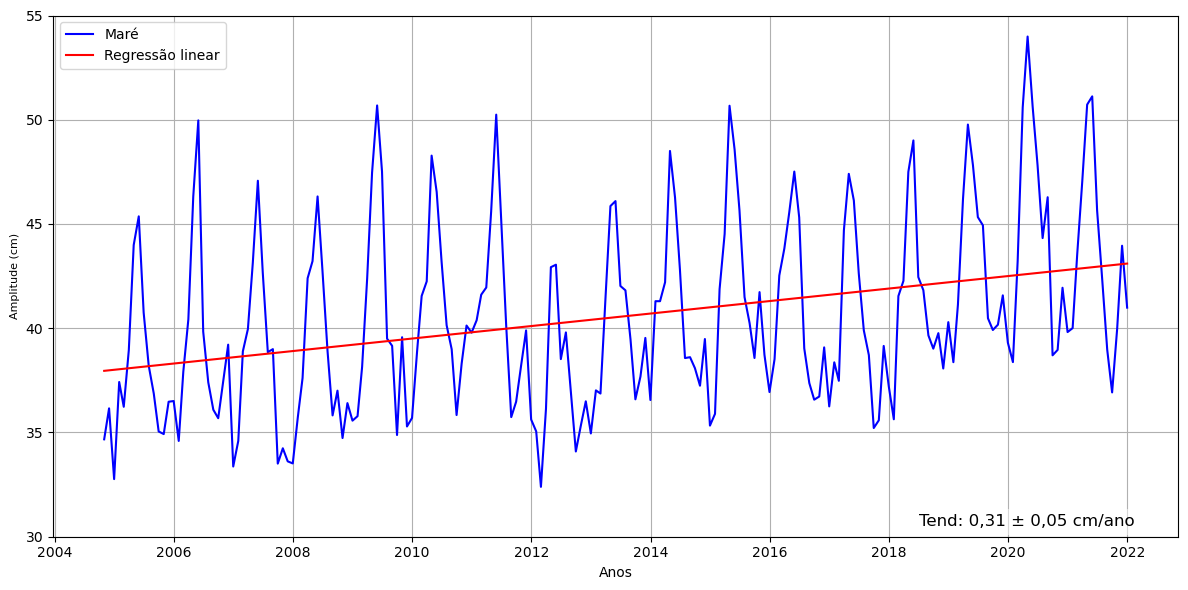

In [37]:
# Importe a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Resolução desejada
dpi = 300
Trend = '0,31 ± 0,05'  # Defina o valor da tendência

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['alt_zero'], 'b', label='Maré')
#plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], linestyle='--', color='b', label='Maré')  # Corrigido aqui
#plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear', 'lineWidth', 1.5)
plt.plot(df['data_hora'], alt_est, 'r', label='Regressão linear', linewidth=1.5)


# Adicione o valor da tendência linear abaixo da legenda
plt.text(0.77, 0.02, f'Tend: {Trend} cm/ano', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='w', edgecolor='none', alpha=0.5))

#plt.title('Nível médio anual mar em Salvador', fontsize=12)
plt.legend(loc='upper left')
plt.xlabel('Anos')
plt.ylabel('Amplitude (cm)', fontsize=8)
plt.grid(True)
# Define os limites e os marcadores dos eixos y
plt.ylim(30 , 55)
plt.yticks(range(30, 56, 5))
# Define o formato do eixo x para mostrar anos e meses (AAAA, MM)
# Salvar a figura
#plt.savefig('D:/graficos/Tendencia/nivel_medio_anual_Salvador_semtitulo.png', dpi=dpi)  # Salva a figura com a resolução especificada


plt.tight_layout()
plt.show()


In [42]:
df.to_csv('D:/Sazonalidade/dataframe_sazonalidades/tend_Salvador.csv', index=False)

In [40]:
import numpy as np

# Calcule o desvio padrão da série de dados 'alt_zero'
desvio = np.std(df['alt_zero'])

# Exiba o desvio padrão
print("Desvio padrão:", desvio)

Desvio padrão: 4.454183785053557


In [39]:
# Calcular a média móvel de 12 períodos com janelas centradas
df['Media_Movel_12'] = df['alt_zero'].rolling(window=12, center=True).sum()

In [12]:
df['Media_Movel_2_Centrada'] = df['Media_Movel_12'].rolling(window=2, center=True).sum()

In [13]:
# Calculando a média móvel centrada dividida por 24
df['Media_Movel_Centrada'] = df['Media_Movel_2_Centrada'] / 24

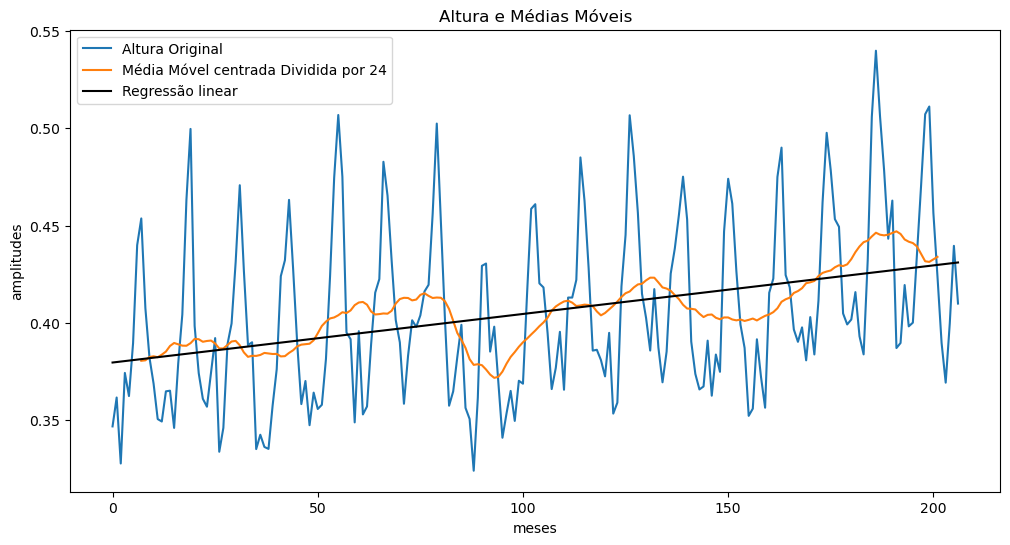

In [14]:
# Plotar as alturas originais
plt.figure(figsize =(12, 6))
plt.plot(df['alt_zero'], label='Altura Original')

# Plotar a média móvel de período 12
#plt.plot(data['Media_Movel_12'], label='Média Móvel de 12 Períodos')

# Plotar a média móvel centrada dividida por 24
#plt.plot(data['Media_Movel_2_Centrada'], label='Média Móvel 2 Centrada ')

plt.plot(df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(alt_est, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [15]:
# Calcular os índices sazonais subtraindo a média móvel centrada da altura original
df['indices_sazonais'] = df['alt_zero'] - df['Media_Movel_Centrada']

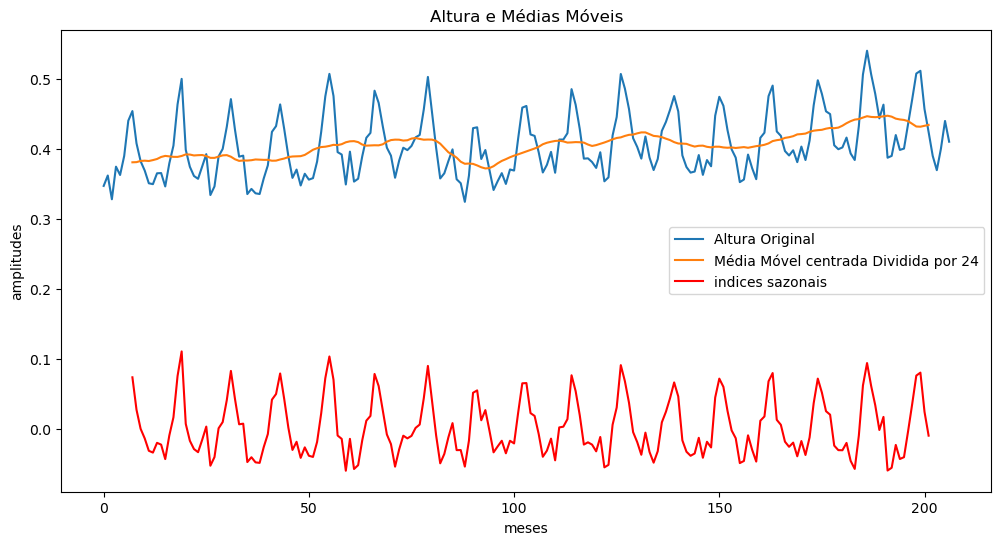

In [16]:
# Plotar as alturas originais
plt.figure(figsize=(12, 6))
# Plotar as alturas originais
plt.plot(df['alt_zero'], label='Altura Original')


plt.plot(df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
#plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas

plt.plot(df['indices_sazonais'], 'r', label='indices sazonais')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [17]:
#filtrar os dados para cada mês toda serie temporal
mensal01 = df['data_hora'].dt.month

In [18]:
#adicionar acoluna de meses no Dataframe como 'mensal'
df['mensal'] = df['data_hora'].dt.month

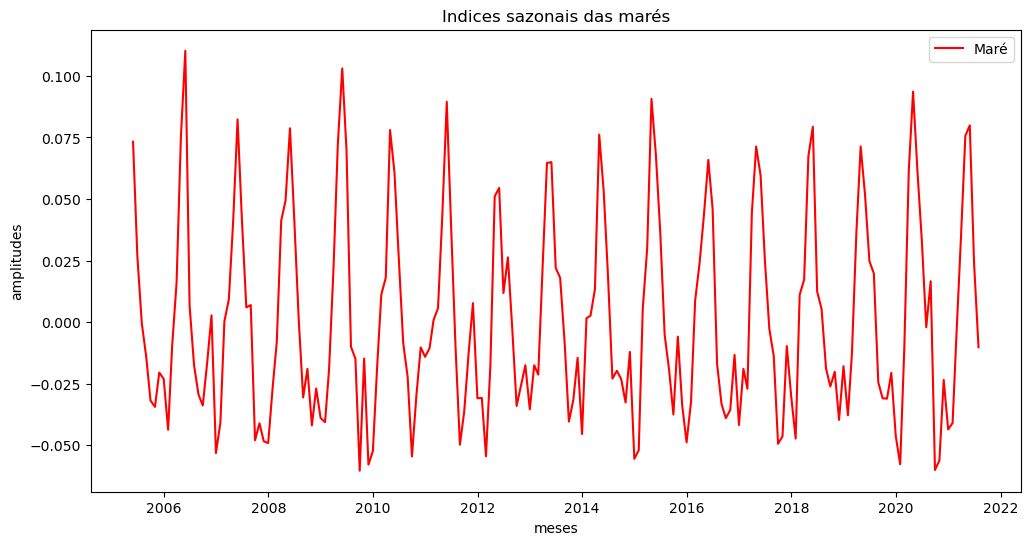

In [19]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['indices_sazonais'], 'r', label='Maré')
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [20]:
#liste de nomes dos meses 
#liste de nomes dos meses 
meses = ['dezembro','janeiro', 'fevereiro','março',
         'abril', 'maio','junho', 'julho',
         'agosto', 'setembro', 'outubro',
         'novembro']
# dicionário para armazenar os filtros de cada mês
filtros_meses = {}

# loop através dos meses
for mes in range(1, 13):
    #filtrar os dados para incluir apenas o mês atual
    filtros_meses[meses[mes-1]] = df[df['data_hora'].dt.month == mes]

#dicionário para armazenar as médias dos indices sazonais para cada meês
medias_ind_sazonal = {}
for mes in meses:
    #calcular a media dos índices sazonais para o mês atual
    medias_ind_sazonal[mes] = filtros_meses[mes]['indices_sazonais'].mean()

In [21]:
medias_ind_sazonal

{'dezembro': -0.03203525540289749,
 'janeiro': -0.007855999255216673,
 'fevereiro': 0.023726035736402085,
 'março': 0.06646321908280291,
 'abril': 0.07263193714224515,
 'maio': 0.029846783295415548,
 'junho': -0.0017100249834515486,
 'julho': -0.017349645223846067,
 'agosto': -0.03897786925518406,
 'setembro': -0.02970308659409376,
 'outubro': -0.02108434242780044,
 'novembro': -0.039132340533012525}

In [22]:
#criar um novo dataframe para e transfromar o dicionario em conjuntos

# Criando o DataFrame
df1 = pd.DataFrame(list(medias_ind_sazonal.items()), columns=['mes_nome', 'media_indice_sazonal'])
df1

,mes_nome,media_indice_sazonal
0,dezembro,-0.032035
1,janeiro,-0.007856
2,fevereiro,0.023726
3,março,0.066463
4,abril,0.072632
5,maio,0.029847
6,junho,-0.001710
7,julho,-0.017350
8,agosto,-0.038978
9,setembro,-0.029703


In [23]:
#Fazendo a soma, para que dei 0 segundo a definição do modelo adetivo o somatorio das média dos indices sazonais tem que ser igual a zero
soma_md_indices = sum(df1['media_indice_sazonal'])

In [24]:
#calcular o excesso
excesso = soma_md_indices/12
excesso

0.00040161763178025886

In [25]:
#indices corrigidos
df1['media_indice_corrigido'] = df1['media_indice_sazonal'] - excesso
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido
0,dezembro,-0.032035,-0.032437
1,janeiro,-0.007856,-0.008258
2,fevereiro,0.023726,0.023324
3,março,0.066463,0.066062
4,abril,0.072632,0.072230
5,maio,0.029847,0.029445
6,junho,-0.001710,-0.002112
7,julho,-0.017350,-0.017751
8,agosto,-0.038978,-0.039379
9,setembro,-0.029703,-0.030105


In [26]:
import scipy.io as sio
# Salvar o DataFrame em um arquivo .mat
#sio.savemat('Salvador.mat', {'Salvador': df1.to_dict(orient='list')})

In [27]:
#df1.to_csv('D:/Sazonalidade/dataframe_sazonalidades/sazonalidade_Salvador.csv', index=False)

In [28]:
sum(df1['media_indice_corrigido'])

-1.3877787807814457e-17

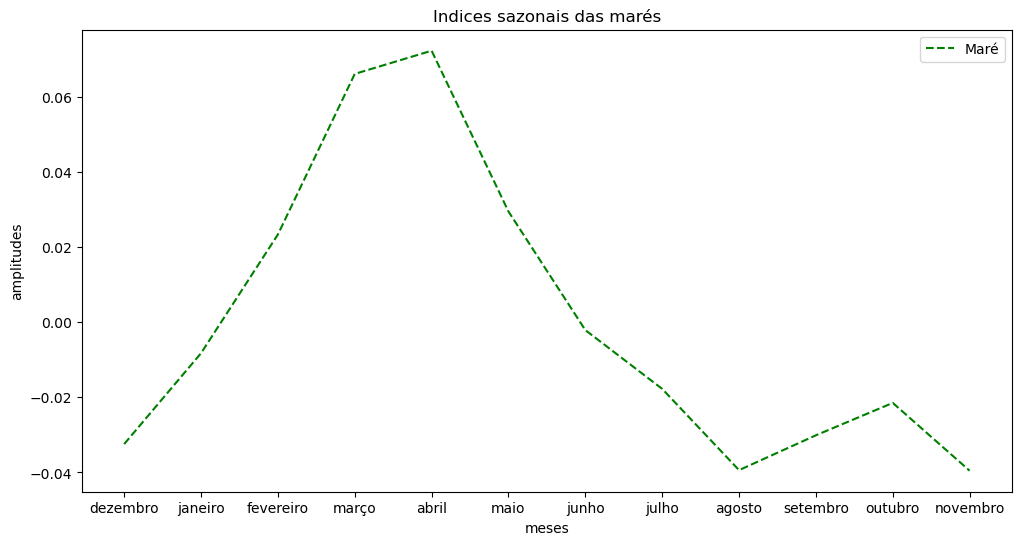

In [29]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df1['mes_nome'], df1['media_indice_corrigido'], linestyle='--', color='g', label='Maré') 
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [30]:
# Supondo que 'data' seja o nome do seu DataFrame
df['data_hora'] = pd.to_datetime(df['data_hora'])

# Criando a nova coluna 'anomes' no formato YYYY-MM
df['anomes'] = df['data_hora'].dt.strftime('%Y-%m')


In [31]:
# Dicionário para mapear nome do mês para número do mês
meses = {
    'janeiro': 1,
    'fevereiro': 2,
    'março': 3,
    'abril': 4,
    'maio': 5,
    'junho': 6,
    'julho': 7,
    'agosto': 8,
    'setembro': 9,
    'outubro': 10,
    'novembro': 11,
    'dezembro': 12
}

# Mapeando o nome do mês para o número do mês usando o dicionário 'meses'
df1['mes'] = df1['mes_nome'].map(meses)

#ordenando os meses pra ficar bonitinho
df1 = df1.sort_values(by='mes')

In [32]:
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido,mes
1,janeiro,-0.007856,-0.008258,1
2,fevereiro,0.023726,0.023324,2
3,março,0.066463,0.066062,3
4,abril,0.072632,0.072230,4
5,maio,0.029847,0.029445,5
6,junho,-0.001710,-0.002112,6
7,julho,-0.017350,-0.017751,7
8,agosto,-0.038978,-0.039379,8
9,setembro,-0.029703,-0.030105,9
10,outubro,-0.021084,-0.021486,10


In [33]:
#Criando a nova coluna e adcionando a média pra cada respectivo mês do df
df['indices_sazonais'] = df['mensal'].map(df1.set_index('mes')['media_indice_corrigido'])

In [34]:
df

,data_hora,alt_zero,Media_Movel_12,Media_Movel_2_Centrada,Media_Movel_Centrada,indices_sazonais,mensal,anomes
0,2004-10-31,0.346712,NaN,NaN,NaN,-0.021486,10,2004-10
1,2004-11-30,0.361569,NaN,NaN,NaN,-0.039534,11,2004-11
2,2004-12-31,0.327638,NaN,NaN,NaN,-0.032437,12,2004-12
3,2005-01-31,0.374210,NaN,NaN,NaN,-0.008258,1,2005-01
4,2005-02-28,0.362327,NaN,NaN,NaN,0.023324,2,2005-02
...,...,...,...,...,...,...,...,...
202,2021-08-31,0.389667,NaN,NaN,NaN,-0.039379,8,2021-08
203,2021-09-30,0.369214,NaN,NaN,NaN,-0.030105,9,2021-09
204,2021-10-31,0.399852,NaN,NaN,NaN,-0.021486,10,2021-10
205,2021-11-30,0.439572,NaN,NaN,NaN,-0.039534,11,2021-11


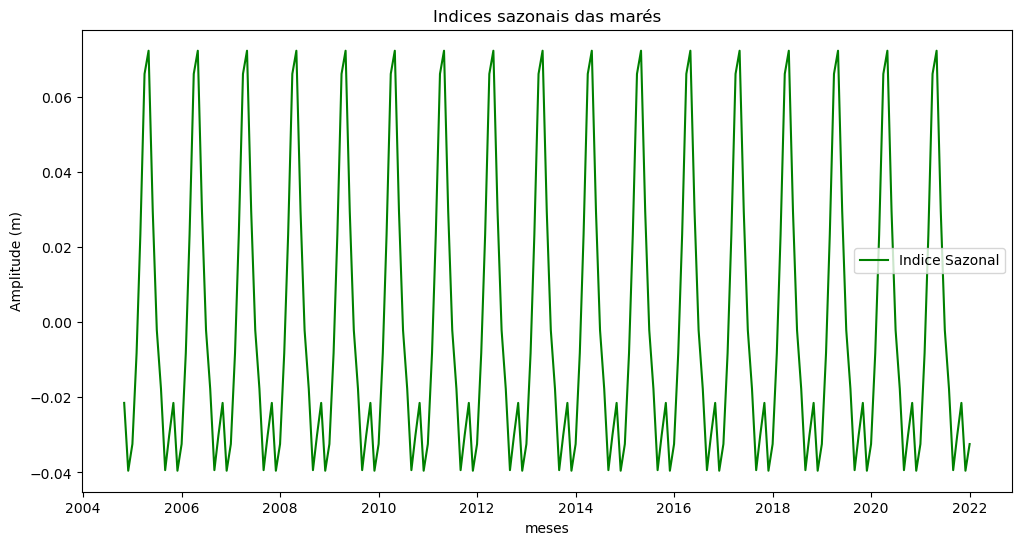

In [35]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['indices_sazonais'], 'g', label='Indice Sazonal')
plt.xlabel('meses')
plt.ylabel('Amplitude (m)')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [36]:
# ciclo anual
df['ciclo_anual'] = df['alt_zero'] - alt_est - df['indices_sazonais']

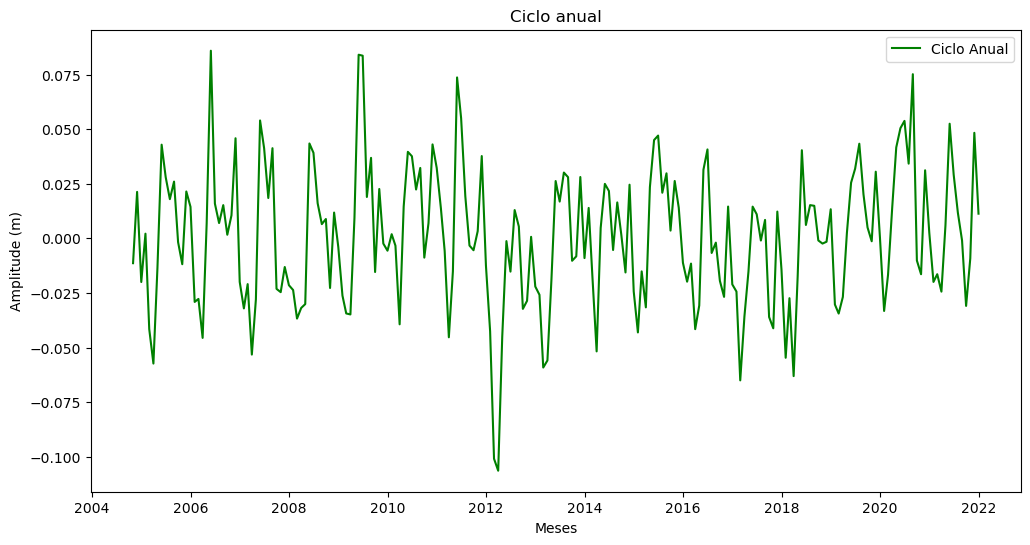

In [37]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['ciclo_anual'], 'g', label='Ciclo Anual')
plt.xlabel('Meses')
plt.ylabel('Amplitude (m)')
plt.title('Ciclo anual')
plt.legend()

# Mostrar o gráfico
plt.show()

In [38]:
data

,dt,hr,alt,alt_zero
data_hora,,,,
2004-10-15 05:00:00,15/10/2004,05:00,8.447,1.567
2004-10-15 06:00:00,15/10/2004,06:00,8.090,1.210
2004-10-15 07:00:00,15/10/2004,07:00,7.505,0.625
2004-10-15 08:00:00,15/10/2004,08:00,6.864,-0.016
2004-10-15 09:00:00,15/10/2004,09:00,6.313,-0.567
...,...,...,...,...
2021-12-31 19:00:00,31/12/2021,19:00,6.431,-0.449
2021-12-31 20:00:00,31/12/2021,20:00,6.235,-0.645
2021-12-31 21:00:00,31/12/2021,21:00,6.280,-0.600


In [39]:
# Extrair o ano de cada data e hora (como a coluna 'data_hora' está indexada, usamos data.index.year)
data['Ano'] = data.index.year
# Calcular a média anual da maré para cada ano
media_anual = data.groupby('Ano')['alt_zero'].mean()

# Calcular a variabilidade interanual (por exemplo, usando o desvio padrão)
variabilidade_interanual = media_anual.std()

print("Variabilidade Interanual da Maré:", variabilidade_interanual)

Variabilidade Interanual da Maré: 0.023736735585369977


In [40]:
data

,dt,hr,alt,alt_zero,Ano
data_hora,,,,,
2004-10-15 05:00:00,15/10/2004,05:00,8.447,1.567,2004
2004-10-15 06:00:00,15/10/2004,06:00,8.090,1.210,2004
2004-10-15 07:00:00,15/10/2004,07:00,7.505,0.625,2004
2004-10-15 08:00:00,15/10/2004,08:00,6.864,-0.016,2004
2004-10-15 09:00:00,15/10/2004,09:00,6.313,-0.567,2004
...,...,...,...,...,...
2021-12-31 19:00:00,31/12/2021,19:00,6.431,-0.449,2021
2021-12-31 20:00:00,31/12/2021,20:00,6.235,-0.645,2021
2021-12-31 21:00:00,31/12/2021,21:00,6.280,-0.600,2021


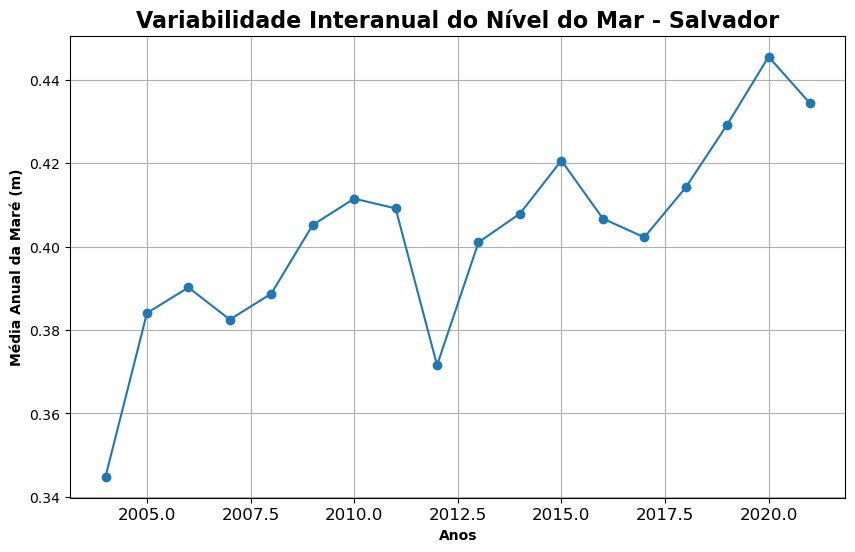

In [41]:
import matplotlib.pyplot as plt

# Plotar os dados da média anual da maré

plt.figure(figsize=(10, 6))
plt.plot(media_anual.index, media_anual.values, marker='o', linestyle='-')
plt.title('Variabilidade Interanual do Nível do Mar - Salvador', fontsize=16, fontweight='bold')
plt.xlabel('Anos', fontweight='bold')
plt.ylabel('Média Anual da Maré (m)', fontweight='bold')
plt.xticks(fontsize=12)  # Ajuste o tamanho da fonte dos rótulos no eixo x
plt.grid(True)
plt.show()

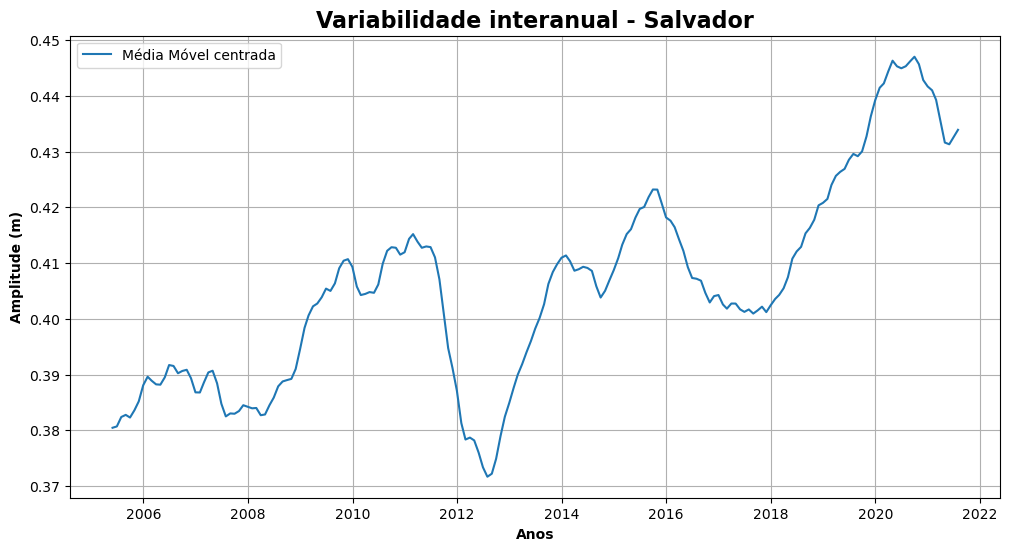

In [42]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['Media_Movel_Centrada'], label= 'Média Móvel centrada')
plt.grid(True)
plt.xlabel('Anos', fontweight='bold')
plt.ylabel('Amplitude (m)', fontweight='bold')
plt.title('Variabilidade interanual - Salvador',fontsize=16, fontweight='bold')
plt.legend()
plt.show()

In [43]:
df

,data_hora,alt_zero,Media_Movel_12,Media_Movel_2_Centrada,Media_Movel_Centrada,indices_sazonais,mensal,anomes,ciclo_anual
0,2004-10-31,0.346712,NaN,NaN,NaN,-0.021486,10,2004-10,-0.011367
1,2004-11-30,0.361569,NaN,NaN,NaN,-0.039534,11,2004-11,0.021292
2,2004-12-31,0.327638,NaN,NaN,NaN,-0.032437,12,2004-12,-0.019991
3,2005-01-31,0.374210,NaN,NaN,NaN,-0.008258,1,2005-01,0.002147
4,2005-02-28,0.362327,NaN,NaN,NaN,0.023324,2,2005-02,-0.041547
...,...,...,...,...,...,...,...,...,...
202,2021-08-31,0.389667,NaN,NaN,NaN,-0.039379,8,2021-08,-0.000965
203,2021-09-30,0.369214,NaN,NaN,NaN,-0.030105,9,2021-09,-0.030939
204,2021-10-31,0.399852,NaN,NaN,NaN,-0.021486,10,2021-10,-0.009174
205,2021-11-30,0.439572,NaN,NaN,NaN,-0.039534,11,2021-11,0.048348


In [44]:
#df.to_csv('D:/Sazonalidade/dataframe_sazonalidades/variação_interna_Salvador.csv', index=False)